In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('data.csv')
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751
5,0.709441,0.636356,0.926317,0.671137,0.236673,0.801994,0.809156,0.307824,0.090940,0.785789,34.617168
6,0.351071,0.973428,0.647135,0.169745,0.978305,0.317741,0.225356,0.125921,0.602965,0.974789,33.848881
7,0.407923,0.683738,0.209158,0.411318,0.084178,0.981751,0.961609,0.151516,0.417738,0.334784,29.783567
8,0.909109,0.793620,0.433454,0.735663,0.730837,0.703209,0.185758,0.458151,0.083150,0.279204,27.491860
9,0.897733,0.796027,0.486561,0.305475,0.449960,0.155526,0.891899,0.105436,0.369027,0.677949,29.915001


# GradientDescentMSE Class

In [61]:
class GradientDescentMse:
    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        self.samples = samples
        self.targets = targets
        self.beta = np.ones(self.samples.shape[1])
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.iteration_loss_dict = {}
        if copy:
            self.samples = samples.copy()
        else:
            self.samples = samples
        
    def add_constant_feature(self):
        self.samples['constant'] = 1
        self.beta = np.append(self.beta, 1)
        
    def calculate_mse_loss(self) -> float:
        return ((np.dot(self.samples, self.beta) - self.targets)**2).mean()
        
    def calculate_gradient(self) -> np.ndarray:
        gradient = []
        for i in range(self.samples.shape[1]):
            d_i = self.samples.values[:, i]
            gradient.append(2 * np.mean((np.dot(self.samples, self.beta) - self.targets) * d_i))
        return np.array(gradient)
    
    def iteration(self):
        self.beta = self.beta - self.learning_rate*self.calculate_gradient()
        
    def learn(self):
        i = 0
        start_beta = self.beta
        previous_mse = self.calculate_mse_loss()
        self.iteration()
        new_beta = self.beta
        next_mse = self.calculate_mse_loss()
        self.iteration_loss_dict[i] = next_mse
        
        while abs(next_mse - previous_mse) >= self.threshold:
            previous_mse = next_mse
            self.iteration()
            new_beta = self.beta
            next_mse = self.calculate_mse_loss()
            i += 1
            self.iteration_loss_dict[i] = next_mse
            
        return self.beta
            
            
            

In [115]:
X = df.drop(['target'], axis = 1)
Y = df['target']

In [64]:
GD = GradientDescentMse(samples = X, targets = Y)
GD.add_constant_feature()
print(GD.learn())


[0.88733305 1.90100713 2.88063607 3.87662612 4.89623507 5.89126182
 6.89254811 7.90311947 8.87580109 9.86109585 4.94854733]
САБИНА ЛУЧШАЯ!


In [117]:
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
thresholds = [0.01, 0.001, 0.0001, 0.00001]

# Визуализация траекторий обучения

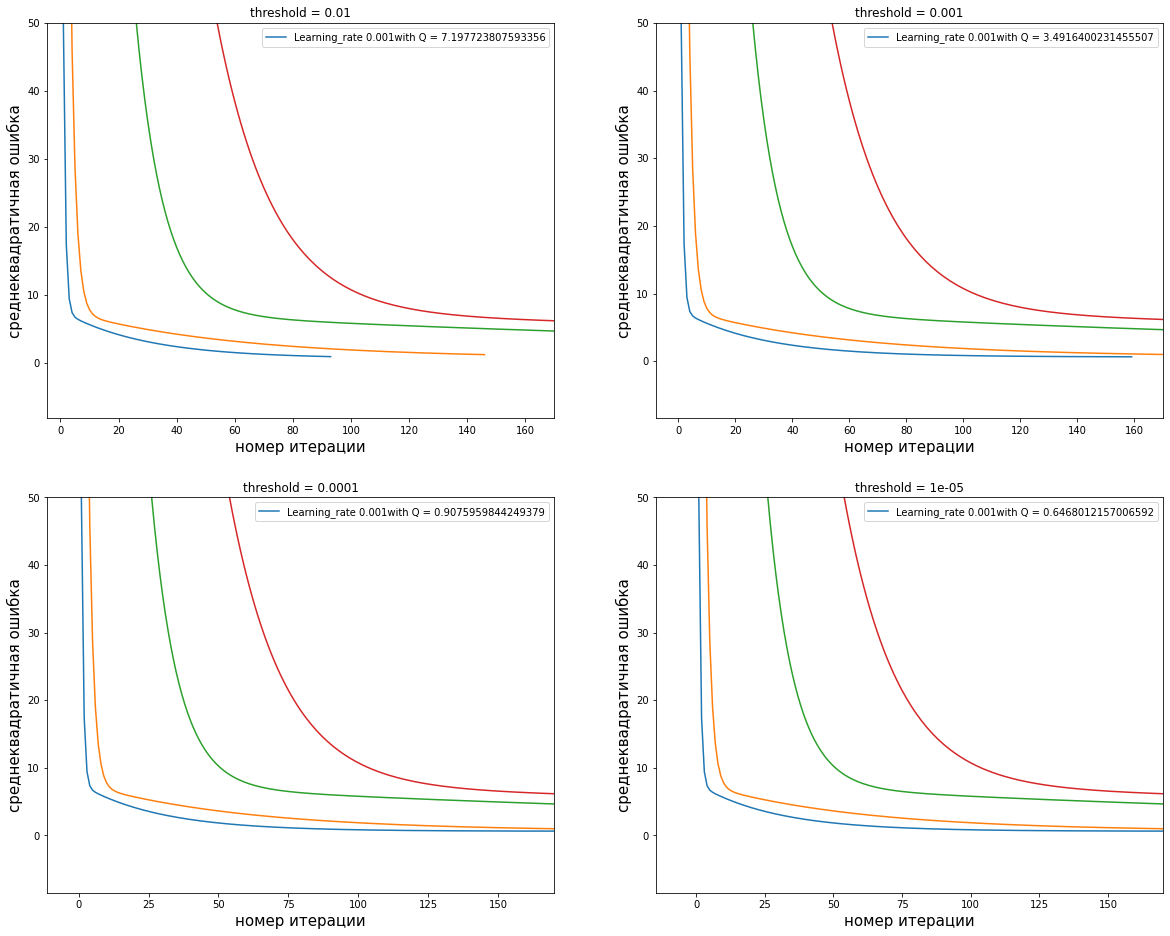

In [122]:


all_iteration_loss_dict = []
fig = plt.figure()

for i in range(len(thresholds)):
    fig.add_subplot(2, 2, i+1)
    fig.set_size_inches(20, 16)
    plt.title(f'threshold = {thresholds[i]}')
    for j in learning_rates:
        GDM = GradientDescentMse(samples = X, targets = Y, learning_rate = j, threshold = thresholds[i])
        GDM.add_constant_feature
        GDM.learn()
        
        plt.plot(GDM.iteration_loss_dict.values())
        plt.xlim((None, 170))
        plt.ylim((None, 50))
        plt.xlabel('номер итерации', fontsize = 15, color = 'black')
        plt.ylabel('среднеквадратичная ошибка', fontsize = 15, color = 'black')
        plt.legend([f'Learning_rate {j}' + f'with Q = {GDM.calculate_mse_loss()}'])